## 什麼是優化器
- 機器學習算法當中，⼤部分算法的本質就是建立優化模型，通過最優化⽅法對⽬標函數進⾏優化從⽽訓練出最好的模型
- 優化算法的功能，是通過改善訓練⽅式，來最⼩化(或最⼤化)損失函數 E(x)
- 優化策略和算法，是⽤來更新和計算影響模型訓練和模型輸出的網絡參數，使其逼近或達到最優值

## 最常見的優化器算法 Gradient Descent
- 這種算法使⽤各參數的梯度值來最⼩化或最⼤化損失函數E(x)。
- 通過尋找最⼩值，控制⽅差，更新模型參數，最終使模型收斂
- 參數的更新分為兩步：第⼀步計算梯度下降的⽅向，第⼆步計算合適的學習

## 動量Momentum
- 梯度⽅向不變的維度上速度變快，梯度⽅向有所改變的維度上的更新速度變慢，這樣就可以加快收斂並減⼩震盪

## Stochastic Gradient Descent (SGD) 隨機梯度下降法
> 找出參數的梯度(利⽤微分的⽅法)，往梯度的⽅向去更新參數(weight)，
#### 優點：
> SGD 每次更新時對每個樣本進⾏梯度更新， 對於很⼤的數據集來說，可能會有相似的樣本，⽽ SGD ⼀次只進⾏⼀次更新，就沒有冗餘，⽽且比較快
##### 缺點： 
> 但是 SGD 因為更新比較頻繁，會造成 cost function 有嚴重的震盪
## SGD調用
> keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
- lr：<float> 學習率。
- Momentum 動量：<float> 參數，⽤於加速 SGD 在相關⽅向上前進，並抑制震盪。
- Decay(衰變)：<float> 每次參數更新後學習率衰減值。
- nesterov：布爾值。是否使⽤ Nesterov 動量。
   [比Momentum更快：揭开Nesterov Accelerated Gradient的真面目](https://zhuanlan.zhihu.com/p/22810533)
    
> 通過名稱來調⽤優化器，將使⽤優化器的默認參數。
- model.compile(loss='mean_squared_error', optimizer='sgd')

> 實例化⼀個優化器對象，然後將它傳入model.compile()，可以修改參數
- sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
- model.compile(loss='mean_squared_error', optimizer=sgd) 

## SGD, mini-batch gradient descent
#### batch-gradient，其實就是普通的梯度下降算法但是採⽤批量處理。
- 當數據集很⼤（比如有100000個左右時），每次 iteration 都要將1000000 個數據跑⼀遍，機器帶不動。於是有了 mini-batch-gradient ——將 1000000 個樣本分成 1000 份，每份 1000 個，都看成⼀組獨立的數據集，進⾏forward_propagation 和 backward_propagation。

#### 在整個算法的流程中，cost function 是局部的，但是W和b是全局的。


#### epoch、 iteration 、 batchsize，mini-batch
- batchsize：批量⼤⼩，即每次訓練在訓練集中取batchsize個樣本訓練；
> batchsize=1;
> batchsize = mini-batch;
> batchsize = whole training set
- iteration：1個 iteration 等於使⽤ batchsize 個樣本訓練⼀次；
- epoch：1個 epoch 等於使⽤訓練集中的全部樣本訓練⼀次；

#### 怎麼配置mini-batch梯度下降
- Mini-batch sizes，簡稱為「batch sizes」，是算法設計中需要調節的參數。
- 較⼩的值讓學習過程收斂更快，但是產⽣更多噪聲。
- 較⼤的值讓學習過程收斂較慢，但是準確的估計誤差梯度。
- batch size 的默認值最好是 32 盡量選擇 2 的冪次⽅，有利於 GPU 的加速。
- 調節 batch size 時，最好觀察模型在不同 batch size 下的訓練時間和驗證誤差的學習曲線。
- 調整其他所有超參數之後再調整 batch size 和學習率。

## Adagrad
> 设置全局学习率之后，每次通过，全局学习率逐参数的除以历史梯度平方和的平方根，使得每个参数的学习率不同.
- 起到的效果是在参数空间更为平缓的方向，会取得更大的进步（因为平缓，所以历史梯度平方和较小，对应学习下降的幅度较小），并且能够使得陡峭的方向变得平缓，从而加快训练速度. [Deep Learning 最优化方法之AdaGrad](https://zhuanlan.zhihu.com/p/29920135)
<img src="imgs/keras09_adagrad.jpg" width="80%">

#### 超參數設定值
> keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
- lr：float >= 0. 學習率.⼀般 η 就取 0.01
- epsilon： float >= 0. 若為 None，默認為 K.epsilon().
- decay：float >= 0. 每次參數更新後學習率衰減值

> 實例化⼀個優化器對象，然後將它傳入model.compile() , 可以修改參數
- opt = optimizers. Adagrad(lr=0.01, epsilon=None, decay=0.0)
- model.compile(loss='mean_squared_error', optimizer=opt)

## RMSprop
> RMSProp 算法也旨在抑制梯度的鋸⿒下降，但與動量相比， RMSProp 不需要⼿動配置學習率超參數，由算法⾃動完成。更重要的是，RMSProp 可以為每個參數選擇不同的學習率。
#### RMSprop 是為了解決 Adagrad 學習率急劇下降問題的 
[Deep Learning 最优化方法之RMSProp](https://blog.csdn.net/BVL10101111/article/details/72616378)
- AdaGrad算法的改进。鉴于神经网络都是非凸条件下的，RMSProp在非凸条件下结果更好，改变梯度累积为指数衰减的移动平均以丢弃遥远的过去历史。
- 经验上，RMSProp被证明有效且实用的深度学习网络优化算法。相比于AdaGrad的历史梯度,RMSProp增加了一个衰减系数来控制历史信息的获取多少
#### RMSprop 調⽤

> keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
- This optimizer is usually a good choice for recurrent neural networks.
- lr：float >= 0. Learning rate.
- rho：float >= 0.
- epsilon：float >= 0. Fuzz factor. If None, defaults to K.epsilon().
- decay：float >= 0. Learning rate decay over each update.

> 實例化⼀個優化器對象，然後將它傳入model.compile() , 可以修改參數
- opt = optimizers.RMSprop(lr=0.001, epsilon=None, decay=0.0)
- model.compile(loss='mean_squared_error', optimizer=opt) 

## Adam
> 2014年12月，Kingma和Lei Ba两位学者提出了Adam优化器，结合AdaGrad和RMSProp两种优化算法的优点。对梯度的一阶矩估计（First Moment Estimation，即梯度的均值）和二阶矩估计（SecondMoment Estimation，即梯度的未中心化的方差）进行综合考虑，计算出更新步长。
> 主要包含以下几个显著的优点：[简单认识Adam优化器](https://www.jianshu.com/p/aebcaf8af76e)
- 实现简单，计算高效，对内存需求少
- 参数的更新不受梯度的伸缩变换影响
- 超参数具有很好的解释性，且通常无需调整或仅需很少的微调
- 更新的步长能够被限制在大致的范围内（初始学习率）
- 能自然地实现步长退火过程（自动调整学习率）
- 很适合应用于大规模的数据及参数的场景
- 适用于不稳定目标函数
- 适用于梯度稀疏或梯度存在很大噪声的问题
#### Adam調用
> keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0,amsgrad=False)
- lr：float >= 0. 學習率。
- beta_1：float, 0 < beta < 1. 通常接近於 1。
- beta_2：float, 0 < beta < 1. 通常接近於 1。
- epsilon：float >= 0. 模糊因數. 若為 None, 默認為 K.epsilon()。
- amsgrad：boolean. 是否應⽤此演算法的 AMSGrad 變種，來⾃論⽂ 「On the Convergence of Adam and Beyond」
- decay：float >= 0. 每次參數更新後學習率衰減值

> 實例化⼀個優化器對象，然後將它傳入 model.compile() , 可以修改參數
- opt = optimizers. Adam(lr=0.001, epsilon=None, decay=0.0)
- model.compile(loss='mean_squared_error', optimizer=opt) 


## 如何選擇優化器

> 如果輸入數據集比較稀疏，SGD、NAG和動量項等⽅法可能效果不好。因此對於稀疏數據集，應該使⽤某種⾃適應學習率的⽅法，且另⼀好處為不需要⼈為調整學習率，使⽤默認參數就可能獲得最優值。
- Adagrad, RMSprop, Adam。

> 如果想使訓練深層網絡模型快速收斂或所構建的神經網絡較為複雜，則應該使⽤Adam或其他⾃適應學習速率的⽅法，因為這些⽅法的實際效果更優。
- Adam 就是在 RMSprop 的基礎上加了 bias-correction 和momentum，
- 隨著梯度變的稀疏，Adam 比 RMSprop 效果會好。

[Adam优化器如何选择](https://blog.csdn.net/qq_35860352/article/details/80772142)

[An overview of gradient descent optimization algorithms](https://arxiv.org/pdf/1609.04747.pdf)

# 課程重點:
    
    利用Keras 建立神經網路模型
    
    查看優化器的結果

# 範例目標:
    
    使用CIFAR-10圖庫, 看看完整神經網路

In [16]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import os

In [10]:
batch_size = 32
num_classes = 10
epochs = 15
data_augmentation = True
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [11]:
# 檢查Dataset 的描述與資訊
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [12]:
#    第一步：選擇模型, 順序模型是多個網絡層的線性堆疊
 
model = Sequential()

#   第二步：構建網絡層
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense( 10)) # 輸出結果是10個類別，所以維度是10   
model.add(Activation('softmax')) # 最後一層用softmax作為激活函數

In [13]:
# 模型建立完成後，統計參數總量
print("Total Parameters：%d" % model.count_params())

Total Parameters：1250858


In [14]:
# 輸出模型摘要資訊
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 15, 15, 64)       

In [17]:
#第三步編譯
'''
 SGD(隨機梯度下降) - Arguments
lr: float >= 0. Learning rate.
momentum: float >= 0. Parameter that accelerates SGD in the relevant direction and dampens oscillations.
decay: float >= 0. Learning rate decay over each update.
nesterov: boolean. Whether to apply Nesterov momentum.
'''

'''
RMSprop- Arguments
lr: float >= 0. Learning rate.
rho: float >= 0.
epsilon: float >= 0. Fuzz factor. If None, defaults to K.epsilon().
decay: float >= 0. Learning rate decay over each update.
'''


#Example:
opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [18]:
# 資料正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [19]:
# 是否要做資料處理
if not data_augmentation:
    print('Not using data augmentation.')
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    print('')
        
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)
    history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)   

'''
   第四步：訓練
   .fit的一些參數
   batch_size：對總的樣本數進行分組，每組包含的樣本數量
   epochs ：訓練次數
   shuffle：是否把數據隨機打亂之後再進行訓練
   validation_split：拿出百分之多少用來做交叉驗證
   verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果
''' 
    

Using real-time data augmentation.

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 231s 5ms/sample - loss: 1.7850 - accuracy: 0.3417 - val_loss: 1.3723 - val_accuracy: 0.4913
Epoch 2/15
50000/50000 [==============================] - 207s 4ms/sample - loss: 1.3277 - accuracy: 0.5181 - val_loss: 1.0919 - val_accuracy: 0.6133
Epoch 3/15
50000/50000 [==============================] - 207s 4ms/sample - loss: 1.1427 - accuracy: 0.5929 - val_loss: 0.9925 - val_accuracy: 0.6547
Epoch 4/15
50000/50000 [==============================] - 216s 4ms/sample - loss: 1.0224 - accuracy: 0.6390 - val_loss: 0.9095 - val_accuracy: 0.6797
Epoch 5/15
50000/50000 [==============================] - 210s 4ms/sample - loss: 0.9484 - accuracy: 0.6636 - val_loss: 0.8150 - val_accuracy: 0.7127
Epoch 6/15
50000/50000 [==============================] - 207s 4ms/sample - loss: 0.8889 - accuracy: 0.6871 - val_loss: 0.8372 - val_accuracy: 0.7080
Epoch 7/15
500

'\n   第四步：訓練\n   .fit的一些參數\n   batch_size：對總的樣本數進行分組，每組包含的樣本數量\n   epochs ：訓練次數\n   shuffle：是否把數據隨機打亂之後再進行訓練\n   validation_split：拿出百分之多少用來做交叉驗證\n   verbose：屏顯模式 - 0：不輸出, 1：輸出進度, 2：輸出每次的訓練結果\n'

In [20]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

#    第六步：輸出
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at C:\Users\qishi shi\Desktop\ai100-3\晉華-數據挖掘教程\saved_models\keras_cifar10_trained_model.h5 
10000/10000 [==============================] - 7s 749us/sample - loss: 0.6951 - accuracy: 0.7684
Test loss: 0.6951169993400573
Test accuracy: 0.7684


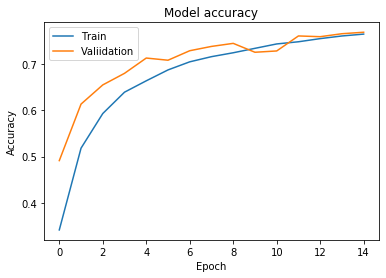

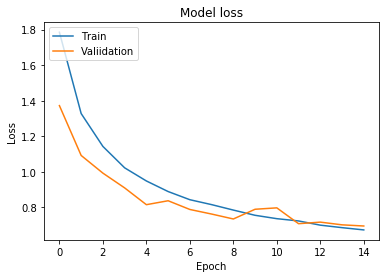

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valiidation'], loc='upper left')
plt.show()